## Goal of this notebook:

The goal is to show how to collect audio features data for tracks from the [official Spotify Web API](https://beta.developer.spotify.com/documentation/web-api/) in order to use it for further analysis/ machine learning which will be part of another notebook.

# 1. Setting Up

The below code is sufficient to set up Spotipy for querying the API endpoint. A more detailed explanation of the whole procedure is available in the [official docs](https://spotipy.readthedocs.io/en/latest/#installation).

In [112]:
from datetime import datetime,timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [174]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# importing my credentials for Spotify API
import creds
cid=creds.cid
secret=creds.secret

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [114]:
playlist_id='0zwcxoitbZ8EYWUGBtShWF'

In [115]:
plst_resp=sp.playlist_items(playlist_id,limit=100, offset=0)

In [116]:
#exploration of response
plst_resp.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [117]:
#exploration of response
print(plst_resp['total'])

plst_resp['items'][0]['track'].keys()

1365


dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [118]:
#adding track info into dataframe

#total amount of tracks in playlist
total=plst_resp['total']


#lists for data from spotify requests about tracks
track_id=[]
track_name=[]
track_artists=[]
track_artists_count=[]
track_artists_ids=[]
track_artists_id2=[]
track_pop=[]
track_dur=[]


for i in range(0,total,100):
    #request to Spotify to bring data for 100 tracks from i-number
    plst_resp=sp.playlist_items(playlist_id,limit=100, offset=i)
    for j in range(len(plst_resp['items'])):
        track_id.append(plst_resp['items'][j]['track']['id'])
        track_name.append(plst_resp['items'][j]['track']['name'])
        track_artists.append(", ".join([x['name'] for x in plst_resp['items'][j]['track']['artists']]))
        track_artists_ids.append(", ".join([x['id'] for x in plst_resp['items'][j]['track']['artists']]))
        track_artists_count.append(len(plst_resp['items'][j]['track']['artists']))
        track_pop.append(plst_resp['items'][j]['track']['popularity'])
        track_dur.append(plst_resp['items'][j]['track']['duration_ms']/60000)

plst=pd.DataFrame({'track_id':track_id,'name':track_name,'artists_names':track_artists,'artists_ids':track_artists_ids,'artists_count':track_artists_count,'popularity':track_pop,'duration':track_dur})

In [119]:
print(plst.shape)
plst.head()

(1365, 7)


,track_id,name,artists_names,artists_ids,artists_count,popularity,duration
0,0oIbkBXuNKpRGrePp7cAeo,Gamma,NTO,7ry8L53T4oJtSIogGYuioq,1,51,6.354233
1,4ThfpcndTEm9P198k5BTEV,In Mexico,"Trashlagoon, Parra for Cuva","2Ceq5nkABzryK0OkaQYtzg, 238y1dKPtMeFEpX3Y6H1Vr",2,35,6.986483
2,18DjkS5pjqCBROtTVH4GK6,We Do What We Want,Alan Fitzpatrick,40JyDxGqtYSowWYT2jaive,1,53,8.426283
3,6kvgeyNduS0YwPKPc6hOmH,In This Dark Time - Two Are Remix,"Aime Simone, Two Are","75oAxYtjhDyLttgvGwQIvM, 3B5IcLPD64jPRgHsSnvHUD",2,46,7.885233
4,0GKDrQqgPf7rRNWtbWg3oy,Красное солнце,"Он Юн, Леха Никонов","5GnduOkKcO3z8phs63Qnaq, 2BdYvHPpYWy5gpgRJdyWwy",2,5,5.066667


In [120]:
plst.reset_index(inplace=True)
plst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1365 non-null   int64  
 1   track_id       1365 non-null   object 
 2   name           1365 non-null   object 
 3   artists_names  1365 non-null   object 
 4   artists_ids    1365 non-null   object 
 5   artists_count  1365 non-null   int64  
 6   popularity     1365 non-null   int64  
 7   duration       1365 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 85.4+ KB


In [121]:
plst.to_csv('plst.csv')

In [122]:
track_af=sp.audio_features(['0oIbkBXuNKpRGrePp7cAeo','4ThfpcndTEm9P198k5BTEV'])
print(track_af)

[{'danceability': 0.664, 'energy': 0.72, 'key': 1, 'loudness': -9.668, 'mode': 1, 'speechiness': 0.0485, 'acousticness': 0.000697, 'instrumentalness': 0.798, 'liveness': 0.126, 'valence': 0.0323, 'tempo': 125.009, 'type': 'audio_features', 'id': '0oIbkBXuNKpRGrePp7cAeo', 'uri': 'spotify:track:0oIbkBXuNKpRGrePp7cAeo', 'track_href': 'https://api.spotify.com/v1/tracks/0oIbkBXuNKpRGrePp7cAeo', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0oIbkBXuNKpRGrePp7cAeo', 'duration_ms': 381254, 'time_signature': 4}, {'danceability': 0.666, 'energy': 0.622, 'key': 8, 'loudness': -9.989, 'mode': 0, 'speechiness': 0.0336, 'acousticness': 0.736, 'instrumentalness': 0.873, 'liveness': 0.115, 'valence': 0.13, 'tempo': 117.998, 'type': 'audio_features', 'id': '4ThfpcndTEm9P198k5BTEV', 'uri': 'spotify:track:4ThfpcndTEm9P198k5BTEV', 'track_href': 'https://api.spotify.com/v1/tracks/4ThfpcndTEm9P198k5BTEV', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4ThfpcndTEm9P198k5BTEV', 'durat

In [123]:
#importing tracks features to dataframe

# timeit library to measure the time needed to run this code
import timeit
start = timeit.default_timer()


tracks_features=[]

# for i in range(0,total,100):
for i in range(0,total,100):
    tracks_features.extend(sp.audio_features(plst['track_id'][i:i+100].values))
    
stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)    

Time to run this code (in seconds): 2.6866803000000345


In [124]:
df_features=pd.DataFrame(tracks_features)
df_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.664,0.720,1,-9.668,1,0.0485,0.000697,0.798,0.126,0.0323,125.009,audio_features,0oIbkBXuNKpRGrePp7cAeo,spotify:track:0oIbkBXuNKpRGrePp7cAeo,https://api.spotify.com/v1/tracks/0oIbkBXuNKpR...,https://api.spotify.com/v1/audio-analysis/0oIb...,381254,4
1,0.666,0.622,8,-9.989,0,0.0336,0.736000,0.873,0.115,0.1300,117.998,audio_features,4ThfpcndTEm9P198k5BTEV,spotify:track:4ThfpcndTEm9P198k5BTEV,https://api.spotify.com/v1/tracks/4ThfpcndTEm9...,https://api.spotify.com/v1/audio-analysis/4Thf...,419190,4
2,0.770,0.966,6,-6.703,1,0.0422,0.000438,0.932,0.098,0.3490,126.010,audio_features,18DjkS5pjqCBROtTVH4GK6,spotify:track:18DjkS5pjqCBROtTVH4GK6,https://api.spotify.com/v1/tracks/18DjkS5pjqCB...,https://api.spotify.com/v1/audio-analysis/18Dj...,505577,4
3,0.696,0.817,11,-7.488,0,0.0388,0.007790,0.656,0.107,0.2710,122.004,audio_features,6kvgeyNduS0YwPKPc6hOmH,spotify:track:6kvgeyNduS0YwPKPc6hOmH,https://api.spotify.com/v1/tracks/6kvgeyNduS0Y...,https://api.spotify.com/v1/audio-analysis/6kvg...,473115,4
4,0.513,0.904,11,-3.483,0,0.4430,0.043600,0.000,0.295,0.2880,75.293,audio_features,0GKDrQqgPf7rRNWtbWg3oy,spotify:track:0GKDrQqgPf7rRNWtbWg3oy,https://api.spotify.com/v1/tracks/0GKDrQqgPf7r...,https://api.spotify.com/v1/audio-analysis/0GKD...,304000,4


In [125]:
plst_features=plst.merge(df_features,left_on='track_id',right_on='id',how='left')
print(plst_features.shape)
plst_features.head()

(1385, 26)


,index,track_id,name,artists_names,artists_ids,artists_count,popularity,duration,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0oIbkBXuNKpRGrePp7cAeo,Gamma,NTO,7ry8L53T4oJtSIogGYuioq,1,51,6.354233,0.664,0.720,...,0.126,0.0323,125.009,audio_features,0oIbkBXuNKpRGrePp7cAeo,spotify:track:0oIbkBXuNKpRGrePp7cAeo,https://api.spotify.com/v1/tracks/0oIbkBXuNKpR...,https://api.spotify.com/v1/audio-analysis/0oIb...,381254,4
1,1,4ThfpcndTEm9P198k5BTEV,In Mexico,"Trashlagoon, Parra for Cuva","2Ceq5nkABzryK0OkaQYtzg, 238y1dKPtMeFEpX3Y6H1Vr",2,35,6.986483,0.666,0.622,...,0.115,0.1300,117.998,audio_features,4ThfpcndTEm9P198k5BTEV,spotify:track:4ThfpcndTEm9P198k5BTEV,https://api.spotify.com/v1/tracks/4ThfpcndTEm9...,https://api.spotify.com/v1/audio-analysis/4Thf...,419190,4
2,2,18DjkS5pjqCBROtTVH4GK6,We Do What We Want,Alan Fitzpatrick,40JyDxGqtYSowWYT2jaive,1,53,8.426283,0.770,0.966,...,0.098,0.3490,126.010,audio_features,18DjkS5pjqCBROtTVH4GK6,spotify:track:18DjkS5pjqCBROtTVH4GK6,https://api.spotify.com/v1/tracks/18DjkS5pjqCB...,https://api.spotify.com/v1/audio-analysis/18Dj...,505577,4
3,3,6kvgeyNduS0YwPKPc6hOmH,In This Dark Time - Two Are Remix,"Aime Simone, Two Are","75oAxYtjhDyLttgvGwQIvM, 3B5IcLPD64jPRgHsSnvHUD",2,46,7.885233,0.696,0.817,...,0.107,0.2710,122.004,audio_features,6kvgeyNduS0YwPKPc6hOmH,spotify:track:6kvgeyNduS0YwPKPc6hOmH,https://api.spotify.com/v1/tracks/6kvgeyNduS0Y...,https://api.spotify.com/v1/audio-analysis/6kvg...,473115,4
4,4,0GKDrQqgPf7rRNWtbWg3oy,Красное солнце,"Он Юн, Леха Никонов","5GnduOkKcO3z8phs63Qnaq, 2BdYvHPpYWy5gpgRJdyWwy",2,5,5.066667,0.513,0.904,...,0.295,0.2880,75.293,audio_features,0GKDrQqgPf7rRNWtbWg3oy,spotify:track:0GKDrQqgPf7rRNWtbWg3oy,https://api.spotify.com/v1/tracks/0GKDrQqgPf7r...,https://api.spotify.com/v1/audio-analysis/0GKD...,304000,4


In [126]:
# plst_features.to_csv('data/plst_features.csv')

plst_features.to_csv('data/plst_features.csv')

In [127]:
plst_features['artists_ids'].head()

0                            7ry8L53T4oJtSIogGYuioq
1    2Ceq5nkABzryK0OkaQYtzg, 238y1dKPtMeFEpX3Y6H1Vr
2                            40JyDxGqtYSowWYT2jaive
3    75oAxYtjhDyLttgvGwQIvM, 3B5IcLPD64jPRgHsSnvHUD
4    5GnduOkKcO3z8phs63Qnaq, 2BdYvHPpYWy5gpgRJdyWwy
Name: artists_ids, dtype: object

In [128]:
# plst_features['artists_ids'].str.split(', ').head()
# plst_features['tmp']=plst_features['artists_ids'].str.split(', ')[0]

# nn=0
# plst_features['artists_id1']=''
# plst_features['artists_id2']=''

artists_lst=[]

for artists in plst_features['artists_ids']:

    artists_lst.extend(artists.split(', '))

In [129]:
artists_df=pd.DataFrame(artists_lst,columns=['artist'])
print(artists_df.count())
artists_df=pd.DataFrame(artists_df['artist'].unique(),columns=['artist'])
print(artists_df.count())

artist    1948
dtype: int64
artist    1353
dtype: int64


In [130]:
print(sp.artist('5eKLa1xyHLq8ERWmT1CRHj').keys())
aa=sp.artists(['5eKLa1xyHLq8ERWmT1CRHj','2Ceq5nkABzryK0OkaQYtzg'])

dict_keys(['external_urls', 'followers', 'genres', 'href', 'id', 'images', 'name', 'popularity', 'type', 'uri'])


In [131]:
', '.join(sp.artist('5eKLa1xyHLq8ERWmT1CRHj')['genres'])

'big beat, breakbeat, electronica'

In [132]:
artists_df['name']=None
artists_df['pop']=None
artists_df['genres']=None
artists_df['followers']=None

# artists_df['name'].astype('object')
# artists_df['pop'].astype('float64')
# artists_df['genres'].astype('object')
# artists_df['followers'].astype('int64')

artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   artist     1353 non-null   object
 1   name       0 non-null      object
 2   pop        0 non-null      object
 3   genres     0 non-null      object
 4   followers  0 non-null      object
dtypes: object(5)
memory usage: 53.0+ KB


In [133]:
n_artists=len(artists_df['artist'])

batch=50

for i in range(0,n_artists,batch):
#     print (i,i+batch)
    
    artists_sp=sp.artists(artists_df['artist'][i:i+batch])

    for j in range(len(artists_sp['artists'])):
#         print (i+j)

        id=artists_sp['artists'][j]['id']
        
        artists_df['name'][artists_df['artist']==id]=artists_sp['artists'][j]['name']
        artists_df['genres'][artists_df['artist']==id]=",".join(artists_sp['artists'][j]['genres'])
        artists_df['pop'][artists_df['artist']==id]=artists_sp['artists'][j]['popularity']
        artists_df['followers'][artists_df['artist']==id]=artists_sp['artists'][j]['followers']['total']
        


In [134]:
# temp
# artists_df['name'][artists_df.loc[:,'artist']=='7ry8L53T4oJtSIogGYuioq']='abc'

artists_df.head()

,artist,name,pop,genres,followers
0,7ry8L53T4oJtSIogGYuioq,NTO,57,"electronica,minimal melodic techno,minimal tec...",199531
1,2Ceq5nkABzryK0OkaQYtzg,Trashlagoon,31,,4571
2,238y1dKPtMeFEpX3Y6H1Vr,Parra for Cuva,57,"downtempo,electronica,new french touch,tropica...",146811
3,40JyDxGqtYSowWYT2jaive,Alan Fitzpatrick,48,"house,minimal techno,tech house,techno",129408
4,75oAxYtjhDyLttgvGwQIvM,Aime Simone,44,,7578


In [135]:
artists_df.replace({'':None},inplace=True)

In [136]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   artist     1353 non-null   object
 1   name       1353 non-null   object
 2   pop        1353 non-null   int64 
 3   genres     967 non-null    object
 4   followers  1353 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 53.0+ KB


In [137]:
artists_df.sort_values(by='pop',ascending=False)

,artist,name,pop,genres,followers
1146,3TVXtAsR1Inumwj472S9r4,Drake,95,"canadian hip hop,canadian pop,hip hop,rap,toro...",65821945
670,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,92,"canadian contemporary r&b,canadian pop,pop",48046020
98,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,90,"chicago rap,rap",17900682
199,7dGJo4pcD2V6oG8kP0tJRR,Eminem,89,"detroit hip hop,hip hop,rap",57989814
1238,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,88,"conscious hip hop,hip hop,rap,west coast rap",21155783
...,...,...,...,...,...
28,3WH4f9ith1qrz2Gg4n22Re,Bogdan Elin,0,None,5
240,27Jzy62LOIpucNVhrSREOk,Glitch,0,None,11
228,2snzF7KrbGdObcg6NRW6xG,Ozma,0,None,69
412,3zhAZ4X9axsUv31yXgT6bM,MLND,0,None,2


In [138]:
artists_df.to_csv('data/artists_df.csv')

In [139]:
track_genres_list=[]

for track in plst_features.iterrows():
    genres_list=[]
#     print(track[1])
    #collecting all gengres of track
    for artist_id in track[1]['artists_ids'].split(', '):
#         print(type(artists_df['genres'][artists_df['artist']==artist_id]))
        for genre in artists_df['genres'][artists_df['artist']==artist_id]:
            if (genre!=None): 
#                 print(genre.split(','))
                genres_list.extend(genre.split(','))  
#     print(len(set(genres_list)))
    for genre in set(genres_list):
        track_genres_list.append({'track_id':track[1]['track_id'],'name':track[1]['name']+' - '+track[1]['artists_names'],'n_genres':len(set(genres_list)),'genre':genre})

In [140]:
track_genres_list[:3]

[{'track_id': '0oIbkBXuNKpRGrePp7cAeo',
  'name': 'Gamma - NTO',
  'n_genres': 5,
  'genre': 'minimal techno'},
 {'track_id': '0oIbkBXuNKpRGrePp7cAeo',
  'name': 'Gamma - NTO',
  'n_genres': 5,
  'genre': 'minimal melodic techno'},
 {'track_id': '0oIbkBXuNKpRGrePp7cAeo',
  'name': 'Gamma - NTO',
  'n_genres': 5,
  'genre': 'new french touch'}]

In [141]:
track_genres_df=pd.DataFrame(track_genres_list)
track_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   track_id  4349 non-null   object
 1   name      4349 non-null   object
 2   n_genres  4349 non-null   int64 
 3   genre     4349 non-null   object
dtypes: int64(1), object(3)
memory usage: 136.0+ KB


In [142]:
track_genres_df.to_csv('data/track_genres_df.csv')

In [143]:
print(len(track_genres_df['genre'].unique()))
track_genres_df['genre'].unique()

783


array(['minimal techno', 'minimal melodic techno', 'new french touch',
       'electronica', 'tropical house', 'downtempo', 'tech house',
       'techno', 'house', 'ukrainian electronic',
       'russian underground rap', 'russian hip hop', 'russian techno',
       'russian electronic', 'footwork', 'ghettotech', 'electra',
       'trance', 'edm', 'progressive house', 'progressive trance',
       'pop dance', 'drum and bass', 'breakbeat', 'jungle',
       'deep disco house', 'swiss house', 'organic house',
       'melodic techno', 'uk hip hop', 'ninja', 'big beat', 'turntablism',
       'trip hop', 'russian alt pop', 'belarusian rock', 'bass house',
       'soundtrack', 'orchestral soundtrack', 'french soundtrack',
       'neurofunk', 'german dnb', 'future garage', 'uk bass',
       'organic electronic', 'focus trance', 'microhouse',
       'frankfurt electronic', 'german techno',
       'russian experimental electronic', 'nu disco', 'japanese chillhop',
       'danish rock', 'future ro

In [144]:
# #experiments

# track_genres_df=pd.read_csv('data/track_genres_df.csv')
# track_genres_df.rename(columns={'Unnamed: 0':'track_index'},inplace=True)
# track_genres_df.info()

In [145]:
# looking for names of some genres

genres_symbs='rock'

track_genres_df['genre'][track_genres_df['genre'].str.contains(genres_symbs)].unique()


array(['belarusian rock', 'danish rock', 'future rock', 'electronic rock',
       'russian punk rock', 'russian post-rock', 'dance rock',
       'post-rock', 'russian rock', 'russian folk rock', 'blues rock',
       'glam rock', 'hard rock', 'album rock', 'ukrainian rock',
       'rap rock', 'indie rock', 'rock-and-roll', 'pop rock',
       'classic russian rock', 'rock', 'modern rock',
       'russian alternative rock', 'modern alternative rock',
       'boston rock', 'alternative rock', 'romanian rock',
       'modern blues rock', 'norwegian rock', 'acoustic rock',
       'canadian rock', 'ukrainian folk rock', 'reggae rock', 'funk rock',
       'roots rock', 'country rock', 'psychedelic rock', 'folk rock',
       'classic rock', 'american post-rock', 'instrumental post-rock',
       'industrial rock', 'piano rock', 'power blues-rock', 'lovers rock',
       'symphonic rock', 'progressive rock', 'art rock', 'welsh rock',
       'indie garage rock', 'australian alternative rock',
     

In [146]:
# str.contain(track_genres_df['genre'].unique())

# for genre in track_genres_df['genre'].unique():
#     if (np.char.count(genre, 'techno')): print(genre)

genre_replace_map={'.*alt$':'alternative','.*drum and bass':'dnb','.*neurofunk':'dnb','.*hip hop':'rap',
                   '.*breakbeat':'breaks','.*trip hop':'triphop','alternative dance':'altern_dance'}

track_genres_replaced_df = track_genres_df.copy()

track_genres_replaced_df['genre'].replace(regex=genre_replace_map,inplace=True)
# 
track_genres_replaced_df.duplicated(subset=['track_id','genre']).sum()

track_genres_replaced_df.drop_duplicates(subset=['track_id','genre'],inplace=True)

In [147]:
# genre_vect_df.sum(axis=0).describe()

track_genres_replaced_df.shape

(4064, 4)

In [148]:
genres_list=['alternative','altern_dance','bass', 'deep','disco','dnb','downtempo','dubstep','dance','edm','electro','folk',
             'funk','hardcore','rap','house','indie','jazz','melodic','metal','organic','pop',
             'punk','rave','rock','soul','techno','trance','triphop', 'witch']

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(vocabulary=genres_list)
genre_vect = vectorizer.fit_transform(track_genres_replaced_df['genre'])
genre_vect.toarray().shape

genre_vect_df=pd.DataFrame(genre_vect.toarray(),columns=vectorizer.get_feature_names())
genre_vect_df.head()

,alternative,altern_dance,bass,deep,disco,dnb,downtempo,dubstep,dance,edm,...,organic,pop,punk,rave,rock,soul,techno,trance,triphop,witch
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.528567,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [149]:
print(track_genres_replaced_df.shape)
genre_vect_df.shape

(4064, 4)


(4064, 30)

In [150]:
genre_vect_df=genre_vect_df.merge(track_genres_replaced_df['track_id'],how='left',left_index=True,right_index=True)
genre_vect_df

,alternative,altern_dance,bass,deep,disco,dnb,downtempo,dubstep,dance,edm,...,pop,punk,rave,rock,soul,techno,trance,triphop,witch,track_id
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0oIbkBXuNKpRGrePp7cAeo
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.528567,0.0,0.0,0.0,0oIbkBXuNKpRGrePp7cAeo
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0oIbkBXuNKpRGrePp7cAeo
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0oIbkBXuNKpRGrePp7cAeo
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0oIbkBXuNKpRGrePp7cAeo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1nrni11feutiL6PNF9IWyk
4060,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1nrni11feutiL6PNF9IWyk
4061,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,5Sr6JdwKgsnEK4utnlr3Fl
4062,0.0,0.0,0.0,0.613762,0.0,0.0,0.0,0.789491,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,170FQ459OeVkKYSSWWXPMB


In [151]:
genre_vect_df=genre_vect_df.groupby('track_id').sum()
genre_vect_df.head()

,alternative,altern_dance,bass,deep,disco,dnb,downtempo,dubstep,dance,edm,...,organic,pop,punk,rave,rock,soul,techno,trance,triphop,witch
track_id,,,,,,,,,,,,,,,,,,,,,
00Ib3wOPcbqZsb9rh1AILF,0.0,0.0,0.0,0.846181,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
00IqXuw3kRMbLrdjUwjZRF,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.626387,0.0,0.0,0.0,0.0,0.0
016COOQeIx1AVtOLLZnaP0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,0.0
018SQDupRTRsl1Wolu1X0c,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
019koTXzsvil0dhwzEQzSX,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0


In [152]:
for i in genre_vect_df.columns:
    genre_vect_df[i]=genre_vect_df[i].apply(lambda x: 1 if (x>0) else 0)

genre_vect_df.head()

,alternative,altern_dance,bass,deep,disco,dnb,downtempo,dubstep,dance,edm,...,organic,pop,punk,rave,rock,soul,techno,trance,triphop,witch
track_id,,,,,,,,,,,,,,,,,,,,,
00Ib3wOPcbqZsb9rh1AILF,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00IqXuw3kRMbLrdjUwjZRF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
016COOQeIx1AVtOLLZnaP0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
018SQDupRTRsl1Wolu1X0c,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
019koTXzsvil0dhwzEQzSX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [153]:
genre_vect_df=genre_vect_df.merge(plst[['index','track_id']],how='left',left_index=True,right_on='track_id').sort_values(by='index',ascending=False)


In [154]:
n_periods=15


data_for_visual=genre_vect_df.drop(columns=['index','track_id'],axis=1).cumsum(axis=0).iloc[0:int(len(genre_vect_df)):int(len(genre_vect_df)/n_periods),:]

In [155]:
top_n_genres_for_vis=20

drop_genres=data_for_visual.sum().sort_values()[:len(data_for_visual.sum())-top_n_genres_for_vis].index
data_for_visual=data_for_visual.drop(columns=list(drop_genres))

data_for_visual.reset_index(drop=True,inplace=True)
data_for_visual

,alternative,altern_dance,bass,deep,dnb,dance,edm,electro,funk,rap,house,indie,melodic,metal,pop,punk,rave,rock,soul,techno
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,7,2,3,5,11,5,6,4,10,22,16,3,4,8,14,3,3,15,4,8
2,13,3,5,12,22,10,15,15,17,36,36,15,8,15,35,6,5,35,7,18
3,17,5,7,13,29,20,22,21,22,51,49,21,10,19,55,12,9,54,8,22
4,22,10,9,19,37,29,31,29,24,64,75,32,10,25,86,12,12,76,8,32
5,28,13,16,27,41,33,37,36,28,84,95,36,10,30,98,18,14,88,9,39
6,31,15,17,30,45,37,41,40,30,92,126,41,13,32,119,27,14,109,15,53
7,36,16,21,34,48,44,49,44,33,102,137,49,16,34,150,29,18,116,20,64
8,39,18,21,36,55,50,55,47,39,117,161,55,17,37,168,32,18,126,22,82
9,44,18,23,42,62,52,60,49,43,134,186,59,19,37,182,36,18,132,25,96


In [156]:
data_for_visual_transposed=data_for_visual.transpose().sort_values(by=len(data_for_visual)-1,ascending=False)

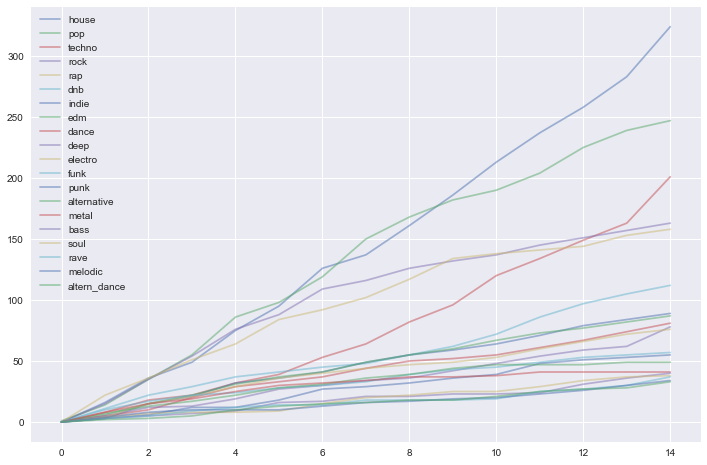

<Figure size 1008x432 with 0 Axes>

In [157]:
fig,ax=plt.subplots(figsize=(12, 8))

plt.figure(figsize=(14, 6))
plt.style.use("seaborn")

for genre in data_for_visual_transposed.iterrows():
    ax.plot(range(len(data_for_visual)),genre[1],label=genre[0],alpha=0.5)
ax.legend(loc='upper left')
plt.show()

<h3>Dynamic off interest for current genre</h3>

In [158]:
#enter the genre

genre='Pop punk'

n_periods=13

all_words_only=True

In [159]:
genre_split=str.lower(genre).split(' ')

In [160]:
genres=track_genres_df['genre']

all_genres=[]
if (all_words_only):
    for each in genre_split:
        genres=genres[genres.str.contains(each)]
    print(len(genres.unique()))
    print(genres.unique())
else: 
    for each in genre_split:
        all_genres.extend(genres[genres.str.contains(each)].unique())
    print(len(all_genres))
    print(all_genres)


3
['russian pop punk' 'pop punk' 'socal pop punk']


In [161]:
vectorizer2=TfidfVectorizer(vocabulary=genre_split)
genre_vect2 = vectorizer2.fit_transform(track_genres_replaced_df['genre'])
genre_vect2.toarray().shape

genre_vect_df2=pd.DataFrame(genre_vect2.toarray(),columns=vectorizer2.get_feature_names())

In [162]:
for i in genre_vect_df2.columns:
    genre_vect_df2[i]=genre_vect_df2[i].apply(lambda x: 1 if (x>0) else 0)

# genre_vect_df2.drop(columns='type',inplace=True)
genre_vect_df2.sum()

pop     360
punk     93
dtype: int64

In [163]:
(genre_vect_df2.sum(axis=1)>0).sum()

438

In [164]:
if (all_words_only):
    genre_vect_df2['type']=genre_vect_df2.sum(axis=1)==len(genre_vect_df2.columns)
else:                                
    genre_vect_df2['type']=genre_vect_df2.sum(axis=1)>0

In [165]:
genre_vect_df2_merged=genre_vect_df2.merge(track_genres_df['track_id'],how='left',left_index=True,right_index=True).reset_index()
genre_vect_df2_merged=genre_vect_df2_merged.groupby('track_id').sum().sort_values(by='index')
genre_vect_df2_merged

,index,pop,punk,type
track_id,,,,
0oIbkBXuNKpRGrePp7cAeo,10,0,0,0
6kvgeyNduS0YwPKPc6hOmH,13,0,0,0
0GKDrQqgPf7rRNWtbWg3oy,14,0,0,0
6dYXU1aDwRLs9K3bG8BhA1,17,0,0,0
4ThfpcndTEm9P198k5BTEV,26,0,0,0
...,...,...,...,...
0FxR849pNzuPnZfVJx9aTU,50973,2,0,0
663GG77Wq2Z6TJW0YgqZAt,52437,5,0,0
3LpIXpas8lnDrUDqOYyB7u,54765,4,0,0


In [166]:
genre_vect_df2_merged['type'][genre_vect_df2_merged['type']>0]=1

data_for_visual2=genre_vect_df2_merged['type'].cumsum(axis=0)
data_for_visual2=data_for_visual2[0:int(len(data_for_visual2)):int(len(data_for_visual2)/(n_periods-1))]
data_for_visual2

track_id
0oIbkBXuNKpRGrePp7cAeo     0
7MC2ZDjvreeUGGvMpz5IhU     0
4tQZCf4CXUuqTHzulav9w2     0
58JApEDzfqDrnLVcLZe7BC     1
2F5UQ1lk1VLzVV8WEY5eyw     3
2ZpV9Jj7R39GDdbAraaLqL     3
6INLpBxo9F5QMer04VXEnd     3
3m9RniHpORCphJPU5r9t8J     3
1fdOGl9xHB7FOAWcQJPcGH     6
6vsBCrM20zIKYkjWQ2qJAo     9
6djOjtmlpshvAVqNngKoJl    11
1DIXPcTDzTj8ZMHt3PDt8p    12
7N1Vjtzr1lmmCW9iasQ8YO    13
Name: type, dtype: int64

In [167]:
data_for_visual2_transposed=data_for_visual2.reset_index(drop=True).transpose().sort_values(ascending=True)
data_for_visual2_transposed

0      0
1      0
2      0
3      1
4      3
5      3
6      3
7      3
8      6
9      9
10    11
11    12
12    13
Name: type, dtype: int64

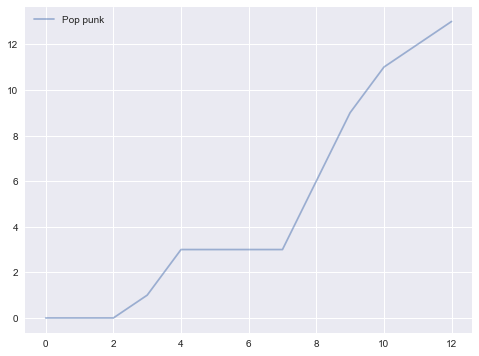

<Figure size 1008x432 with 0 Axes>

In [168]:
fig,ax=plt.subplots(figsize=(8, 6))

plt.figure(figsize=(14, 6))
plt.style.use("seaborn")

ax.plot(range(n_periods),data_for_visual2_transposed,label=genre,alpha=0.5)

ax.legend(loc='upper left')
plt.show()

<h3>Visualization and EDA</h3>

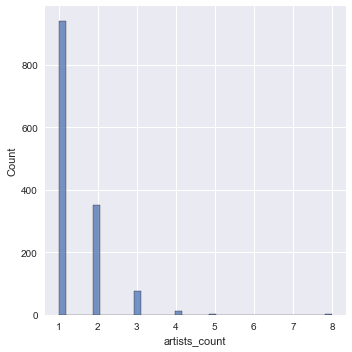

In [169]:
g = sns.displot(plst_features['artists_count'],kind='hist')
plt.show()

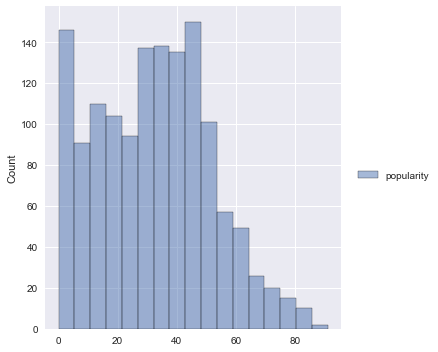

In [170]:
g = sns.displot([plst_features['popularity']])
plt.show()

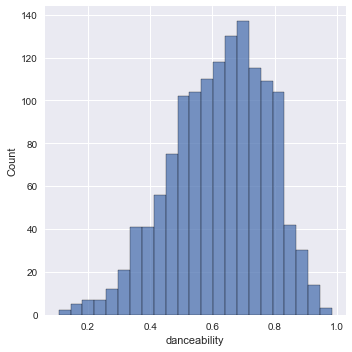

In [171]:
g = sns.displot(plst_features['danceability'])
plt.show()

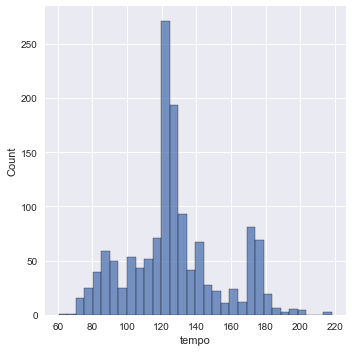

In [172]:
g = sns.displot(plst_features['tempo'])
plt.show()